# Employee Turnover Predictive Analysis

In [1]:
# Problem statement:
#Tech Innovations Inc. company is facing significant  turnover and finds it difficult to attract and 
#keep top-notch talent in crucial roles. Conventional HR methods have not proven successful in tackling 
#these issues, highlighting the necessity for advanced, data-driven strategies to enhance recruitment and retention results.

In [2]:
#Importing relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Classifier Algorithms Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install lazypredict
!pip install SMOTEENN

ERROR: Could not find a version that satisfies the requirement SMOTEENN (from versions: none)
ERROR: No matching distribution found for SMOTEENN


In [4]:
#Import dataset
turnover_df=pd.read_csv(r"C:\\Users\\usuario\\Downloads\\Tech_hr_data.csv")

In [5]:
turnover_df.head()

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description
0,EMP0001,60,Male,Marketing,Engineer,24,2,80818,Campus Recruitment,1.9,7,3,1,4,26,78,0,0,Retention
1,EMP0002,50,Male,Marketing,Specialist,28,2,59932,Campus Recruitment,4.5,4,4,0,2,26,30,3,0,Retention
2,EMP0003,36,Female,Finance,Analyst,18,4,36901,Job Board,3.7,0,1,0,5,18,86,3,0,Retention
3,EMP0004,64,Male,Finance,Manager,3,4,38597,Campus Recruitment,2.2,7,4,1,3,32,28,4,0,Retention
4,EMP0005,29,Female,Marketing,Manager,22,3,93909,Campus Recruitment,2.1,8,4,0,2,14,45,2,0,Retention


In [6]:
turnover_df.head().T

,0,1,2,3,4
Employee_ID,EMP0001,EMP0002,EMP0003,EMP0004,EMP0005
Age,60,50,36,64,29
Gender,Male,Male,Female,Male,Female
Department,Marketing,Marketing,Finance,Finance,Marketing
Position,Engineer,Specialist,Analyst,Manager,Manager
Tenure,24,28,18,3,22
Performance_Rating,2,2,4,4,3
Salary,80818,59932,36901,38597,93909
Recruitment_Source,Campus Recruitment,Campus Recruitment,Job Board,Campus Recruitment,Campus Recruitment
Satisfaction_Score,1.9,4.5,3.7,2.2,2.1


In [7]:
# Display columns with missing values
missing_values = turnover_df.isnull().sum()

missing_values[missing_values > 0].index

Index([], dtype='object')

In [8]:
# Check for missing values
turnover_df.isnull().sum()

Employee_ID             0
Age                     0
Gender                  0
Department              0
Position                0
Tenure                  0
Performance_Rating      0
Salary                  0
Recruitment_Source      0
Satisfaction_Score      0
Last_Promotion_Years    0
Work_Life_Balance       0
Overworked              0
Job_Satisfaction        0
Distance_From_Work      0
Commute_Time            0
Number_Of_Promotions    0
Turnover                0
Turnover_Description    0
dtype: int64

In [9]:
turnover_df.describe()

,Age,Tenure,Performance_Rating,Salary,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,43.014000,14.443000,3.006000,74303.769000,3.485100,4.560000,2.94000,0.312000,3.049000,24.76600,51.92500,2.059000,0.19300
std,12.333772,8.567506,1.417029,26342.205416,0.979698,2.959249,1.45276,0.463542,1.424299,13.89872,21.64088,1.431631,0.39485
min,22.000000,0.000000,1.000000,30287.000000,0.500000,0.000000,1.00000,0.000000,1.000000,1.00000,15.00000,0.000000,0.00000
25%,32.000000,7.000000,2.000000,50912.500000,2.800000,2.000000,2.00000,0.000000,2.000000,13.00000,33.00000,1.000000,0.00000
50%,44.000000,14.000000,3.000000,74239.500000,3.500000,5.000000,3.00000,0.000000,3.000000,24.00000,52.00000,2.000000,0.00000
75%,54.000000,22.000000,4.000000,97722.500000,4.125000,7.000000,4.00000,1.000000,4.000000,37.00000,71.00000,3.000000,0.00000
max,64.000000,29.000000,5.000000,119959.000000,7.600000,9.000000,5.00000,1.000000,5.000000,49.00000,89.00000,4.000000,1.00000


In [10]:
# Exploratory Data Analysis (EDA)

In [11]:
turnover_df['Turnover'].value_counts()

Turnover
0    807
1    193
Name: count, dtype: int64

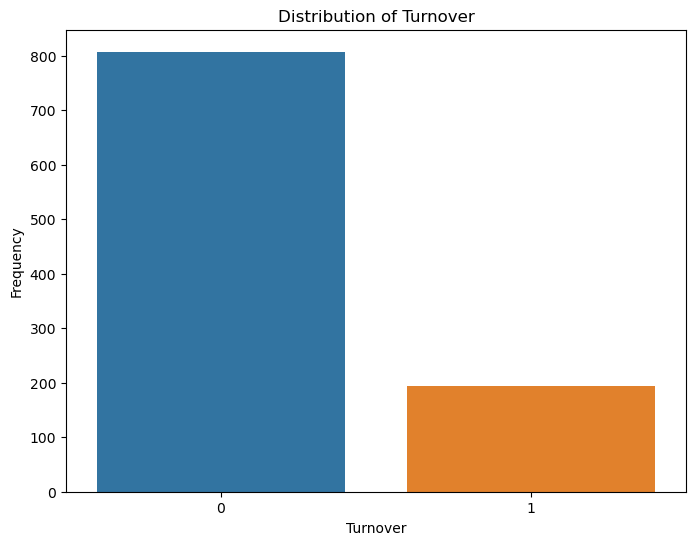

In [12]:
#Distribution of the target variable "Turnover"
plt.figure(figsize = (8,6))
sns.countplot(x= "Turnover", data = turnover_df)
plt.title('Distribution of Turnover')
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.show()

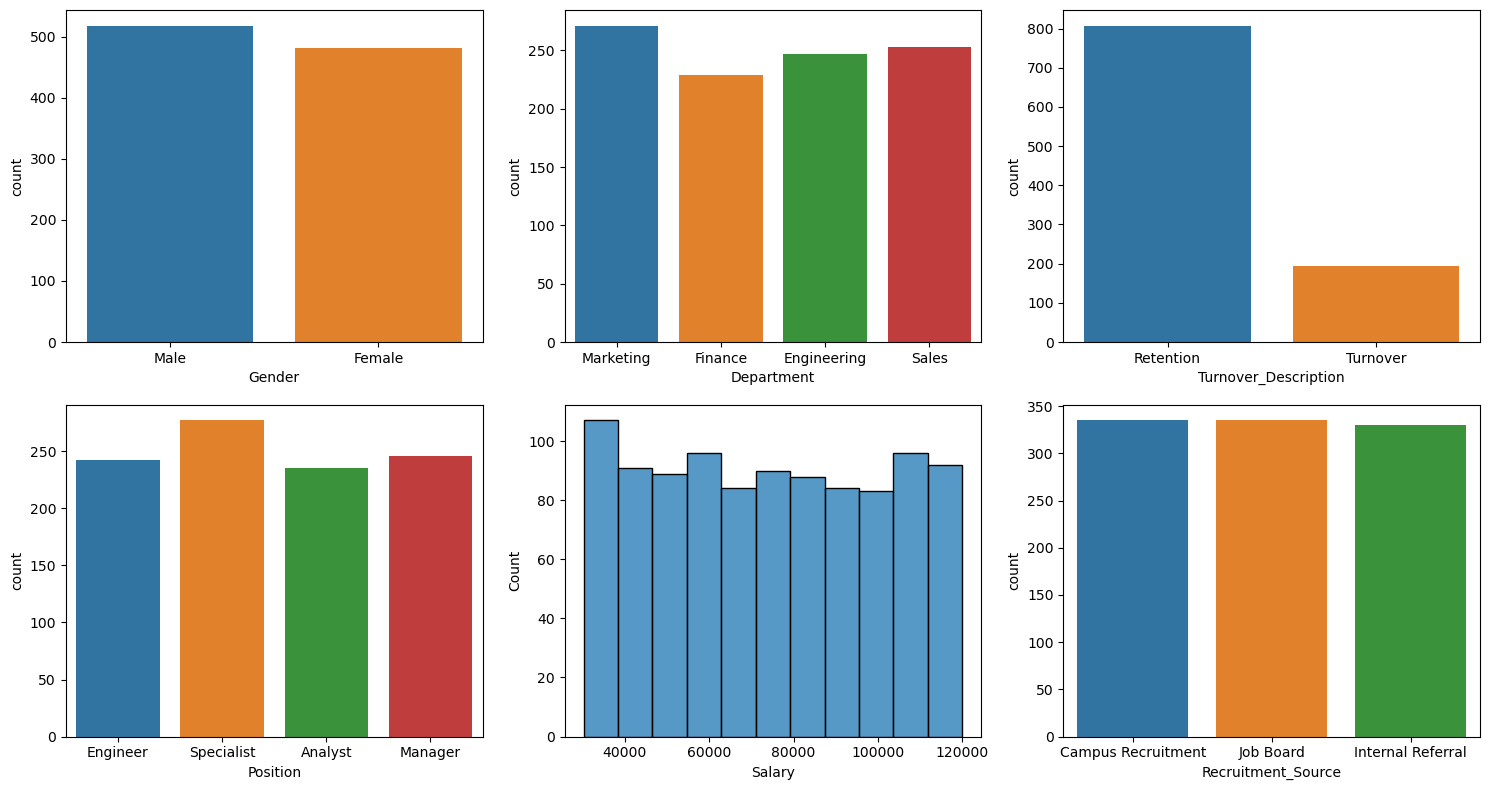

In [13]:
#Distribution univariant analysis
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
plt1 = sns.countplot(x='Gender', data=turnover_df, ax=axs[0, 0])
plt2 = sns.countplot(x='Department', data=turnover_df, ax=axs[0, 1])
plt3 = sns.countplot(x='Turnover_Description', data=turnover_df, ax=axs[0, 2])
plt4 = sns.countplot(x='Position', data=turnover_df, ax=axs[1, 0])
plt5 = sns.histplot(x='Salary', data=turnover_df, ax=axs[1, 1])
plt6 = sns.countplot(x='Recruitment_Source', data=turnover_df, ax=axs[1, 2])
plt.tight_layout()
plt.show()

In [14]:
# Calculate IQR for each feature
Selected_columns = turnover_df[["Age","Tenure", "Performance_Rating", "Salary", "Satisfaction_Score", "Last_Promotion_Years", "Work_Life_Balance", "Overworked", "Job_Satisfaction", "Distance_From_Work", "Commute_Time", "Number_Of_Promotions", "Turnover"]]

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string features to integers using LabelEncoder
for column in turnover_df.columns:
    if turnover_df[column].dtype == 'object':  # Check if column contains strings
        turnover_df[column] = label_encoder.fit_transform(turnover_df[column])

# Calculate IQR for each column
Selected_columns = turnover_df[["Age","Tenure", "Performance_Rating", "Salary", "Satisfaction_Score", "Last_Promotion_Years", "Work_Life_Balance", "Overworked", "Job_Satisfaction", "Distance_From_Work", "Commute_Time", "Number_Of_Promotions", "Turnover"]]

In [16]:
Q1 = Selected_columns.quantile(0.25)
Q1

Age                        32.0
Tenure                      7.0
Performance_Rating          2.0
Salary                  50912.5
Satisfaction_Score          2.8
Last_Promotion_Years        2.0
Work_Life_Balance           2.0
Overworked                  0.0
Job_Satisfaction            2.0
Distance_From_Work         13.0
Commute_Time               33.0
Number_Of_Promotions        1.0
Turnover                    0.0
Name: 0.25, dtype: float64

In [17]:
Q3 = Selected_columns.quantile(0.75)
Q3

Age                        54.000
Tenure                     22.000
Performance_Rating          4.000
Salary                  97722.500
Satisfaction_Score          4.125
Last_Promotion_Years        7.000
Work_Life_Balance           4.000
Overworked                  1.000
Job_Satisfaction            4.000
Distance_From_Work         37.000
Commute_Time               71.000
Number_Of_Promotions        3.000
Turnover                    0.000
Name: 0.75, dtype: float64

In [18]:
IQR = Q3 - Q1
IQR

Age                        22.000
Tenure                     15.000
Performance_Rating          2.000
Salary                  46810.000
Satisfaction_Score          1.325
Last_Promotion_Years        5.000
Work_Life_Balance           2.000
Overworked                  1.000
Job_Satisfaction            2.000
Distance_From_Work         24.000
Commute_Time               38.000
Number_Of_Promotions        2.000
Turnover                    0.000
dtype: float64

In [19]:
#defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
lower_bound 
upper_bound = Q3 + 1.5 * IQR


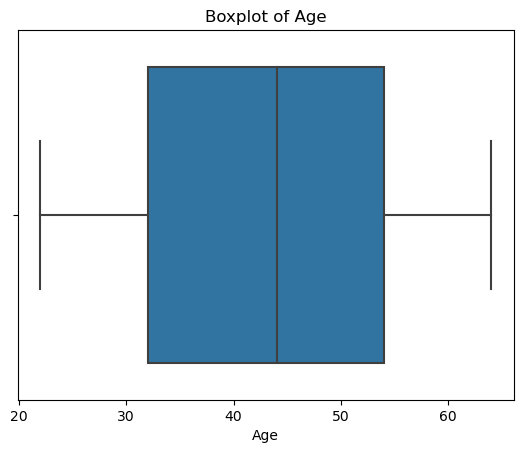

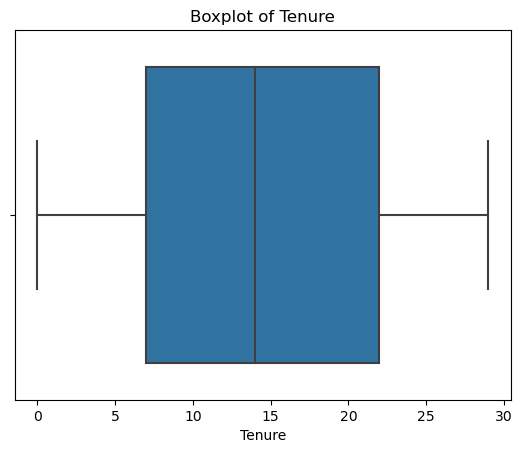

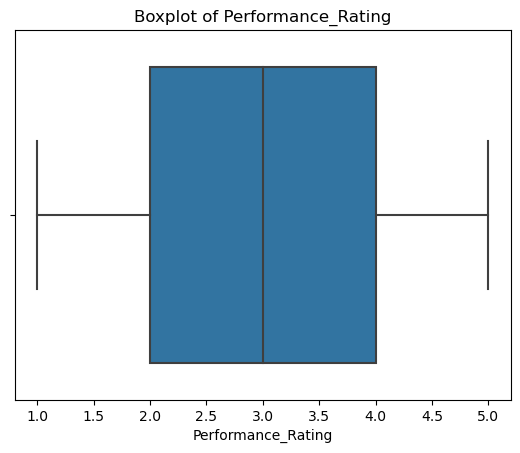

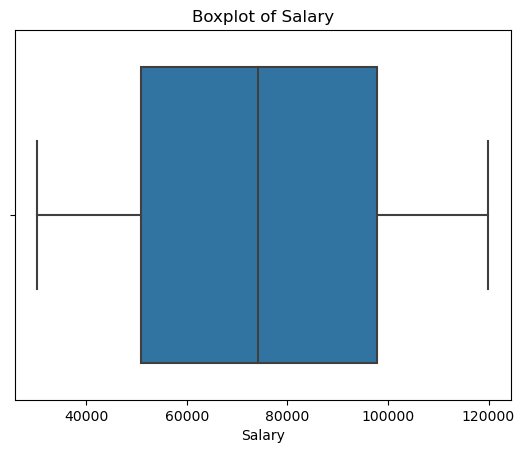

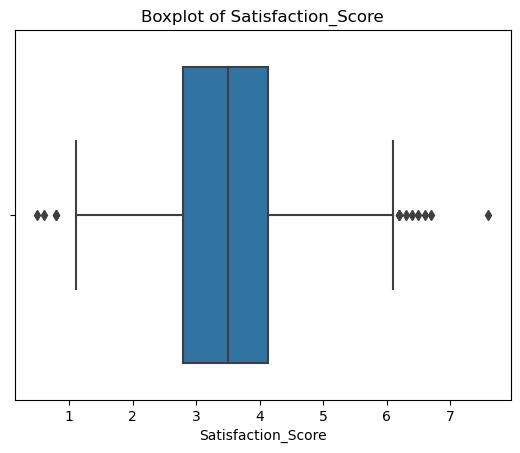

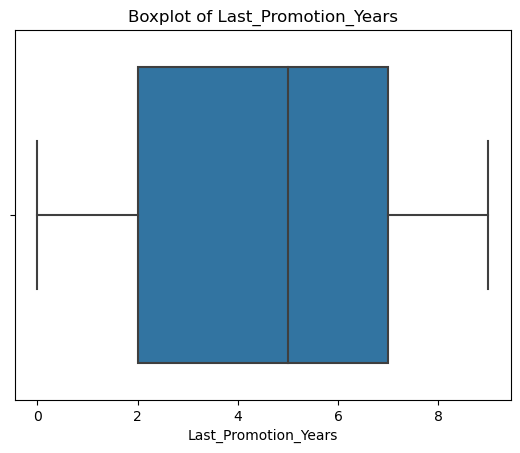

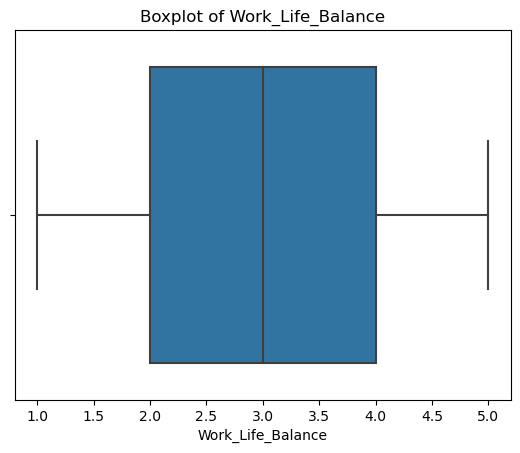

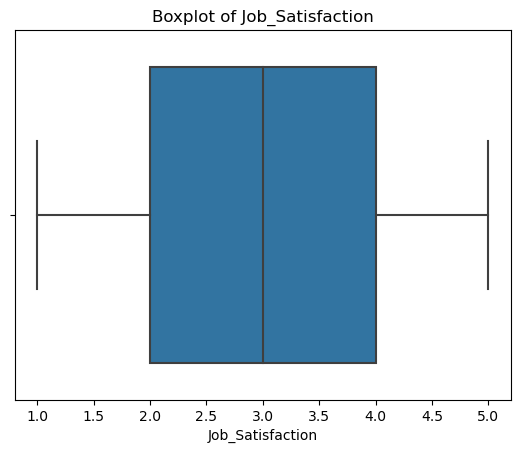

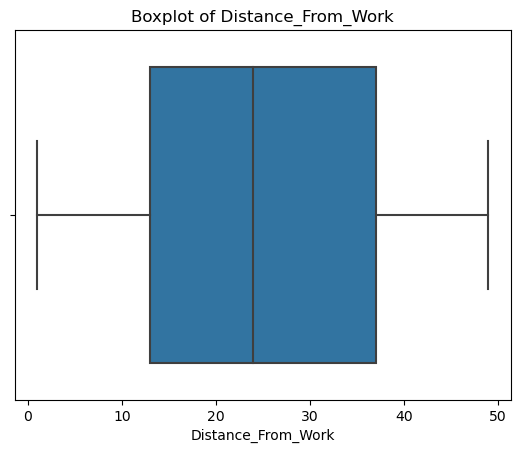

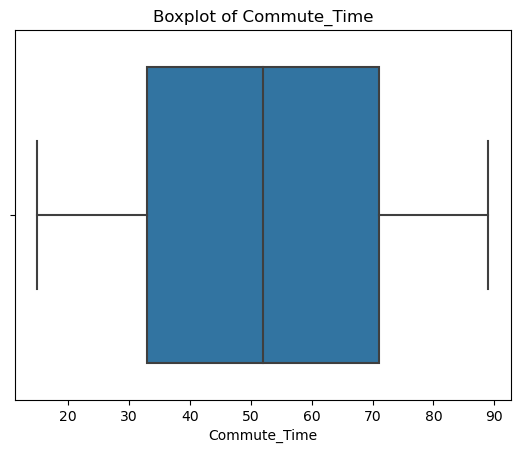

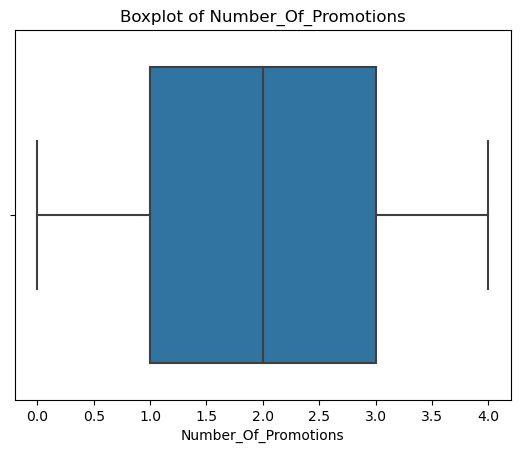

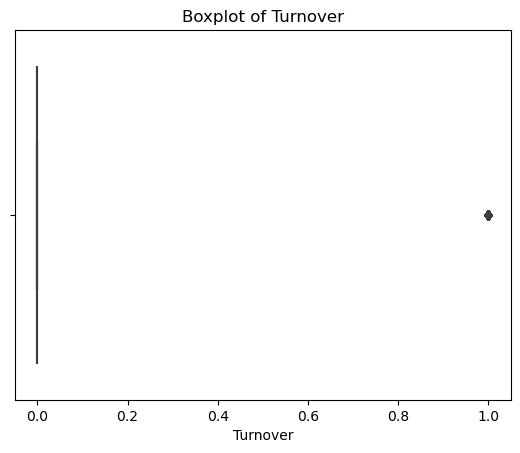

In [20]:
#Checking for outliers
# Selecting only numerical columns
numerical_columns = ['Age', 'Tenure', 'Performance_Rating', 'Salary', 'Satisfaction_Score',
                     'Last_Promotion_Years', 'Work_Life_Balance', 'Job_Satisfaction',
                     'Distance_From_Work', 'Commute_Time', 'Number_Of_Promotions', 'Turnover']

# Iterating through each numerical column
for column in numerical_columns:
    # Creating a boxplot for the current columns
    sns.boxplot(x=turnover_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

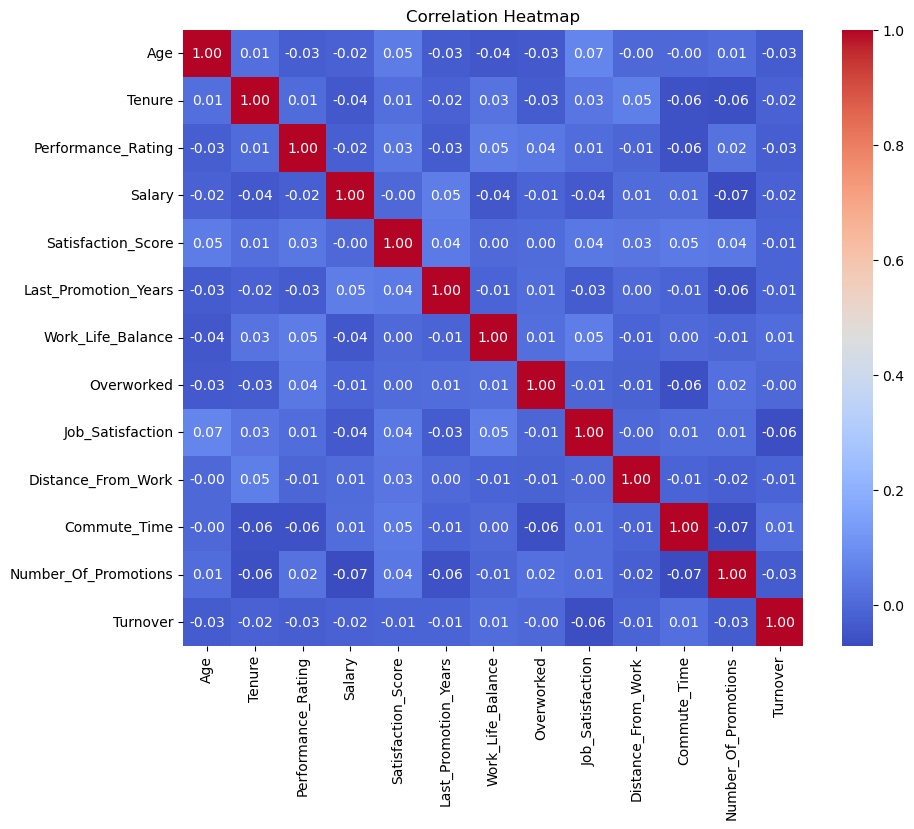

In [21]:
# Heatmap to show correlations
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = Selected_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Feature Engineering and Data preprocessing

In [22]:
# Find maximum value Tenure
max_Tenure = turnover_df["Tenure"].max()

# Find minimum value
min_Tenure = turnover_df["Tenure"].min()

print("Maximum Tenure:", max_Tenure)
print("Minimum Tenure:", min_Tenure)


Maximum Tenure: 29
Minimum Tenure: 0


In [23]:
# Tenure
#turnover_df["Tenure_category"] = pd.cut(df["Tenure"], bins=[0, 10, 20, float('inf')], labels=['Earlycareer_Employees', 'Experinced_Employees', 'Longterm_Employees'])
#turnover_df["Tenure_category"].value_counts()

# Define bins and labels for Tenure category
bins = [0, 10, 20, float('inf')]
labels = ['Earlycareer_Employees', 'Experinced_Employees', 'Longterm_Employees']

# Cut the "tenure" column into tenure duration categories
turnover_df["Tenure_category"] = pd.cut(turnover_df["Tenure"], bins=bins, labels=labels)

# Display the count of each tenure category
turnover_df["Tenure_category"].value_counts()

Tenure_category
Experinced_Employees     340
Earlycareer_Employees    331
Longterm_Employees       299
Name: count, dtype: int64

In [24]:
turnover_df['Tenure']

0      24
1      28
2      18
3       3
4      22
       ..
995    24
996    17
997    18
998    22
999    22
Name: Tenure, Length: 1000, dtype: int64

In [25]:
turnover_df.head()

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description,Tenure_category
0,0,60,1,2,1,24,2,80818,0,1.9,7,3,1,4,26,78,0,0,0,Longterm_Employees
1,1,50,1,2,3,28,2,59932,0,4.5,4,4,0,2,26,30,3,0,0,Longterm_Employees
2,2,36,0,1,0,18,4,36901,2,3.7,0,1,0,5,18,86,3,0,0,Experinced_Employees
3,3,64,1,1,2,3,4,38597,0,2.2,7,4,1,3,32,28,4,0,0,Earlycareer_Employees
4,4,29,0,2,2,22,3,93909,0,2.1,8,4,0,2,14,45,2,0,0,Longterm_Employees


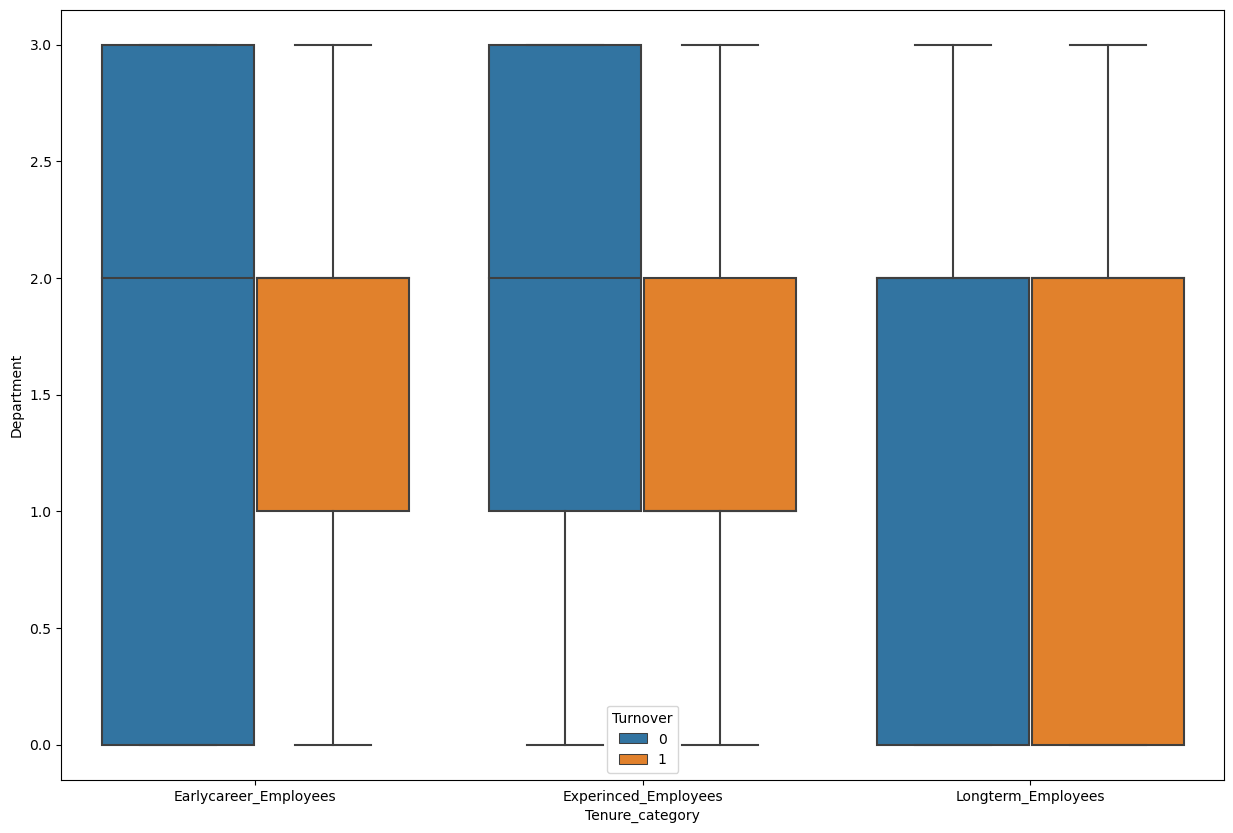

In [26]:
#Bivariate Analysis
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Department', hue='Turnover', data=turnover_df);

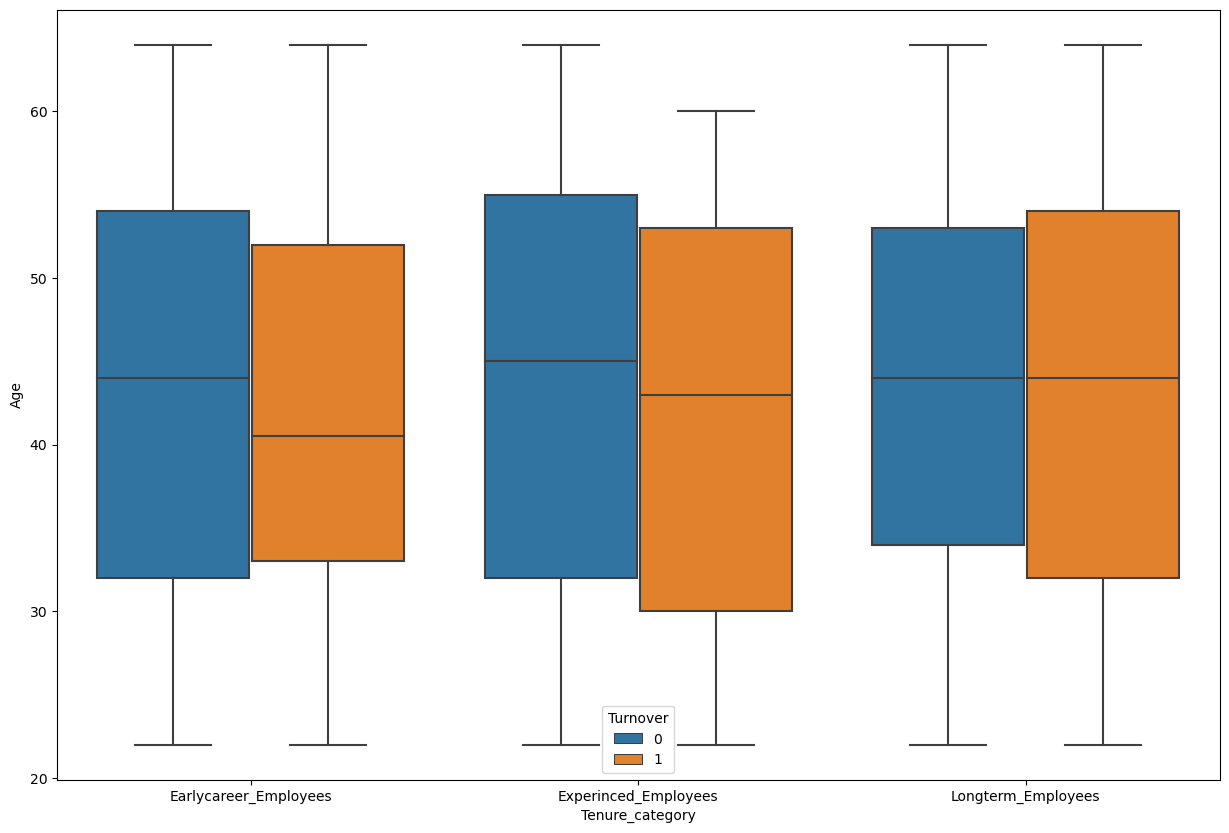

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Age', hue='Turnover', data=turnover_df);

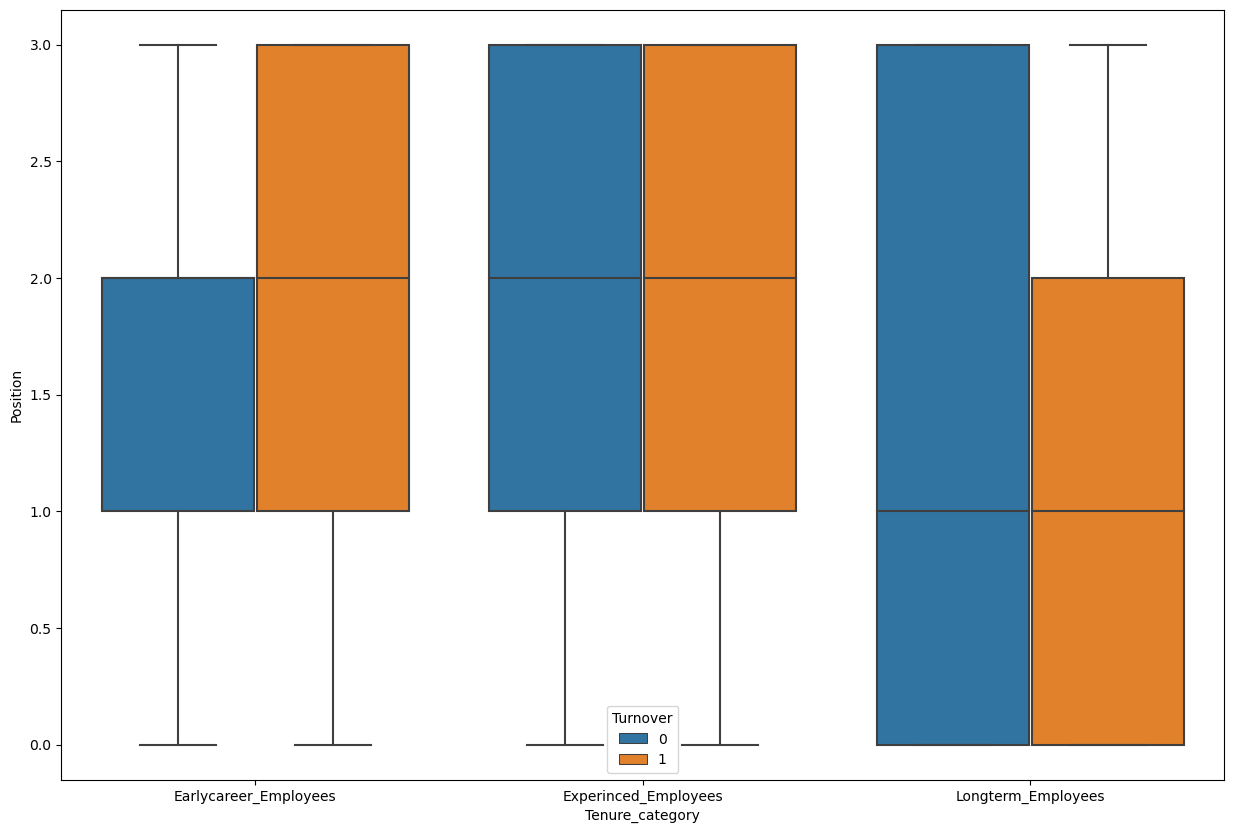

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Position', hue='Turnover', data=turnover_df);

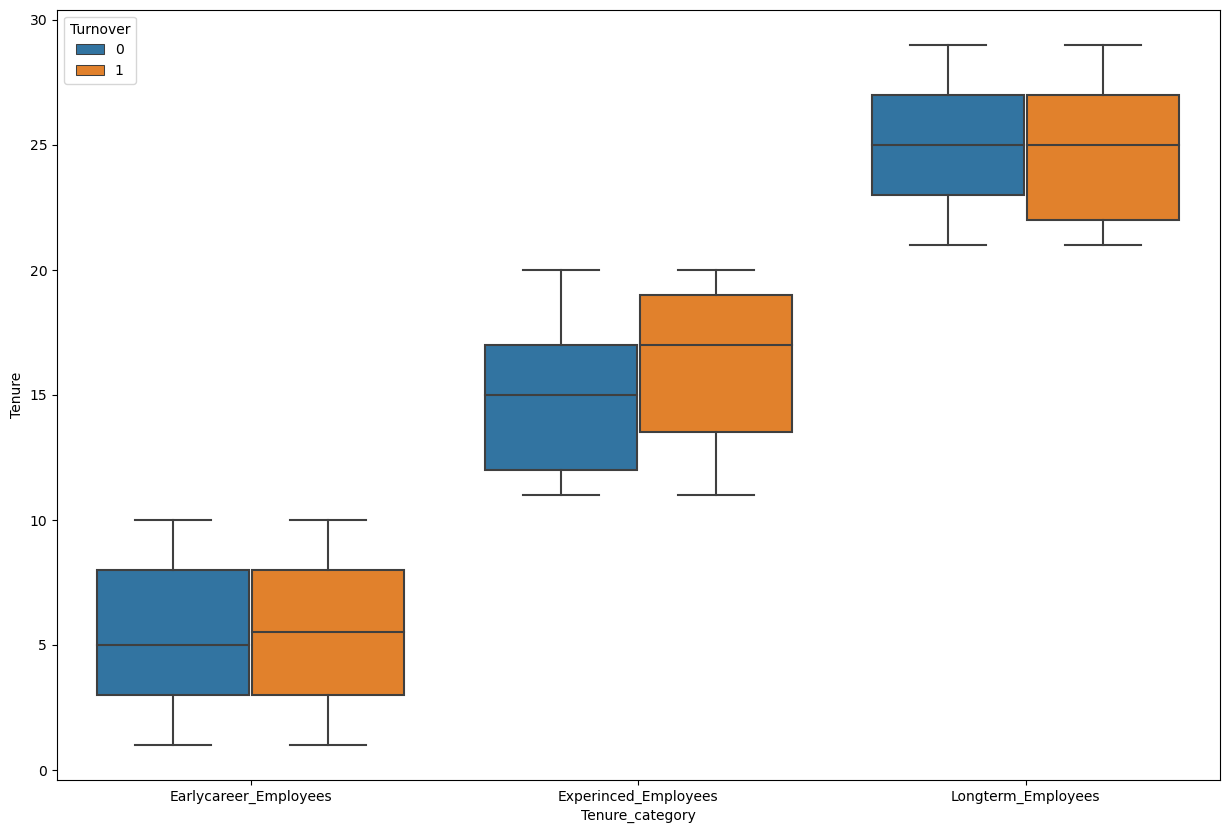

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Tenure', hue='Turnover', data=turnover_df);

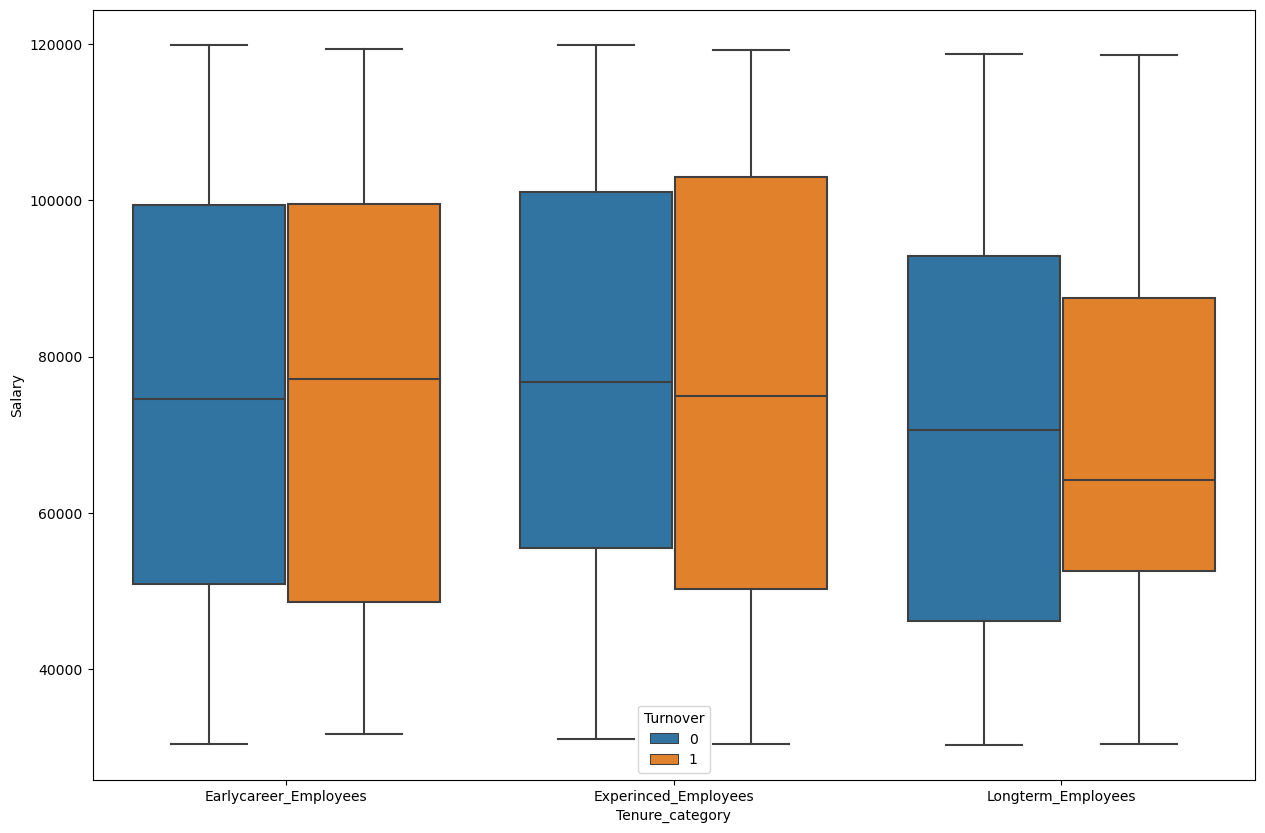

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Salary', hue='Turnover', data=turnover_df);

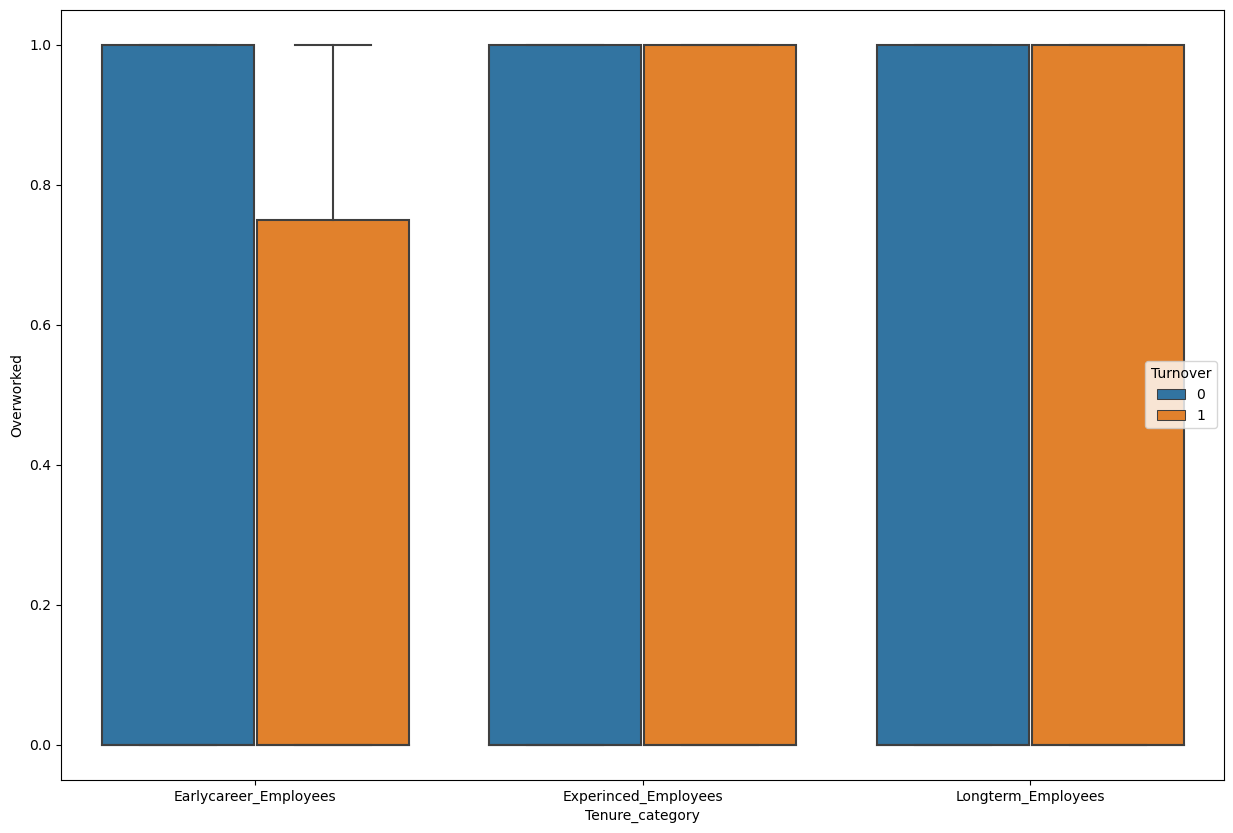

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Overworked', hue='Turnover', data=turnover_df);

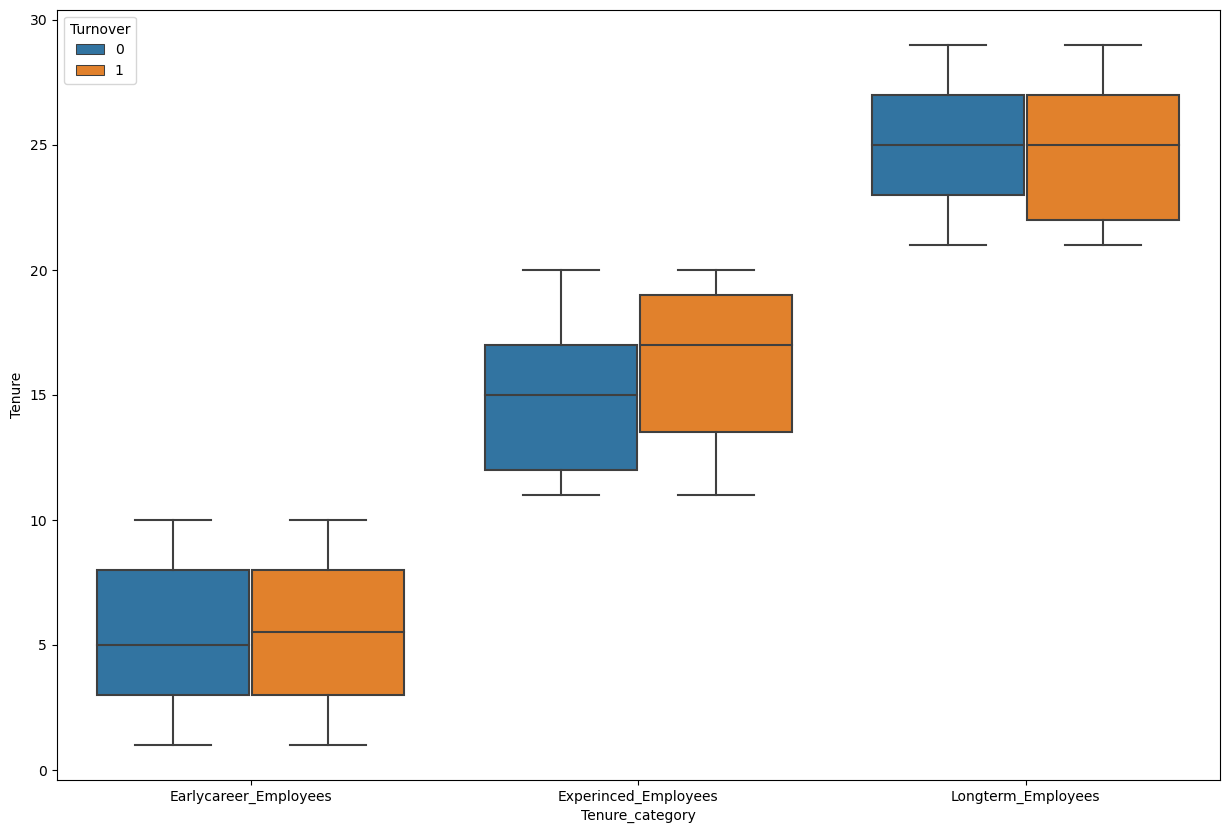

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Tenure', hue='Turnover', data=turnover_df);

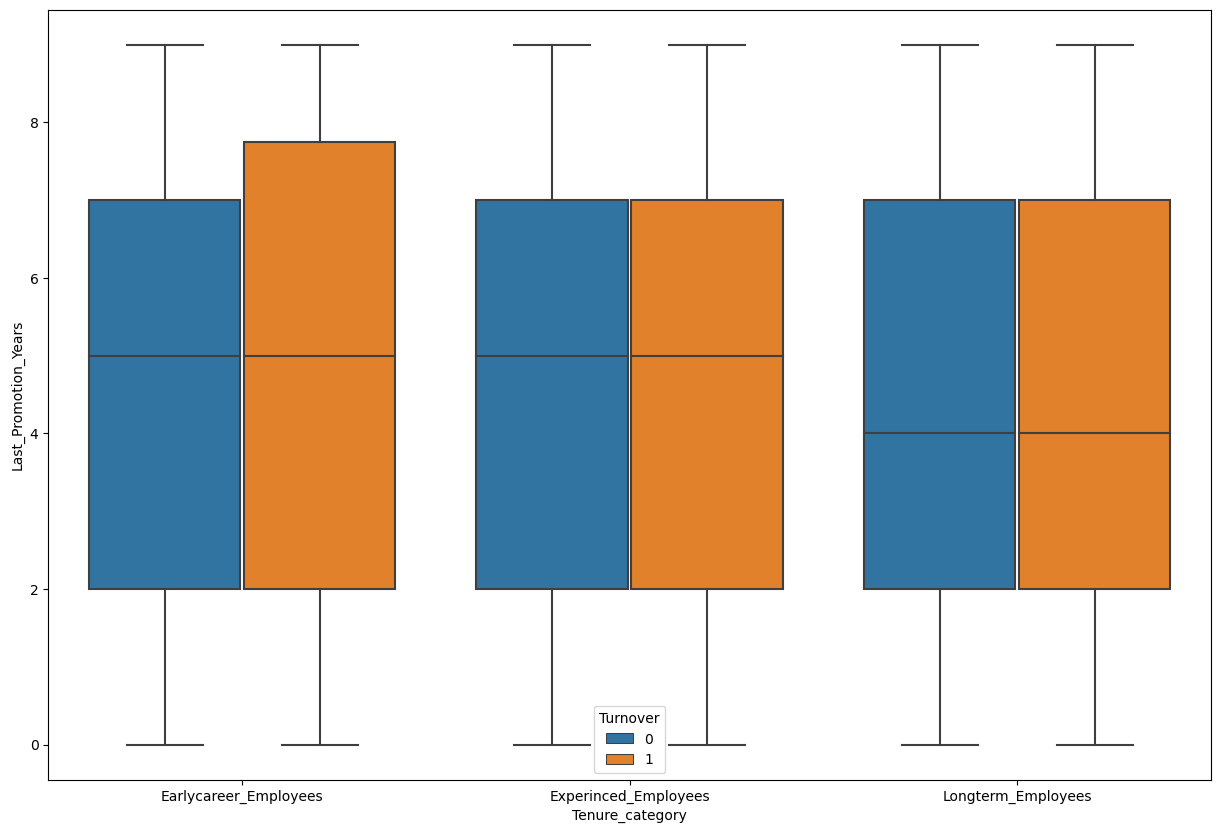

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Last_Promotion_Years', hue='Turnover', data=turnover_df);

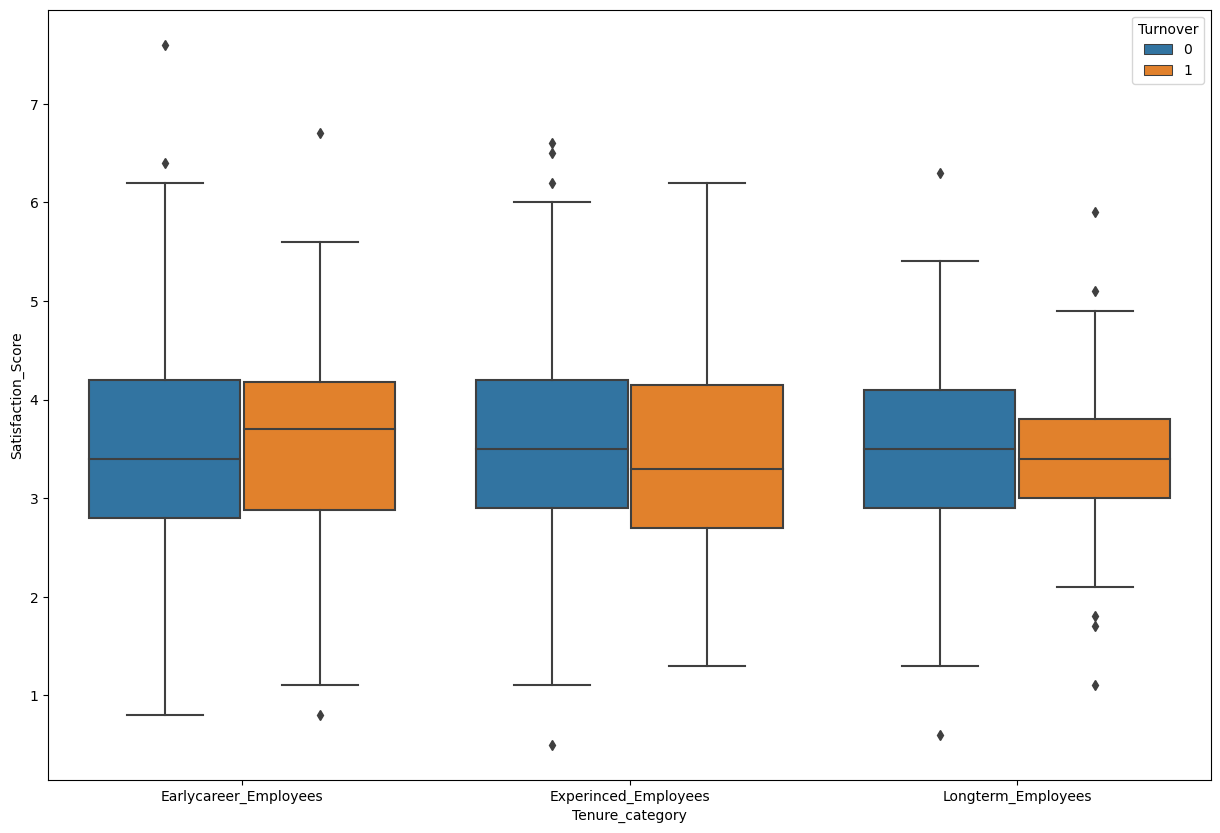

In [34]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Satisfaction_Score', hue='Turnover', data=turnover_df);

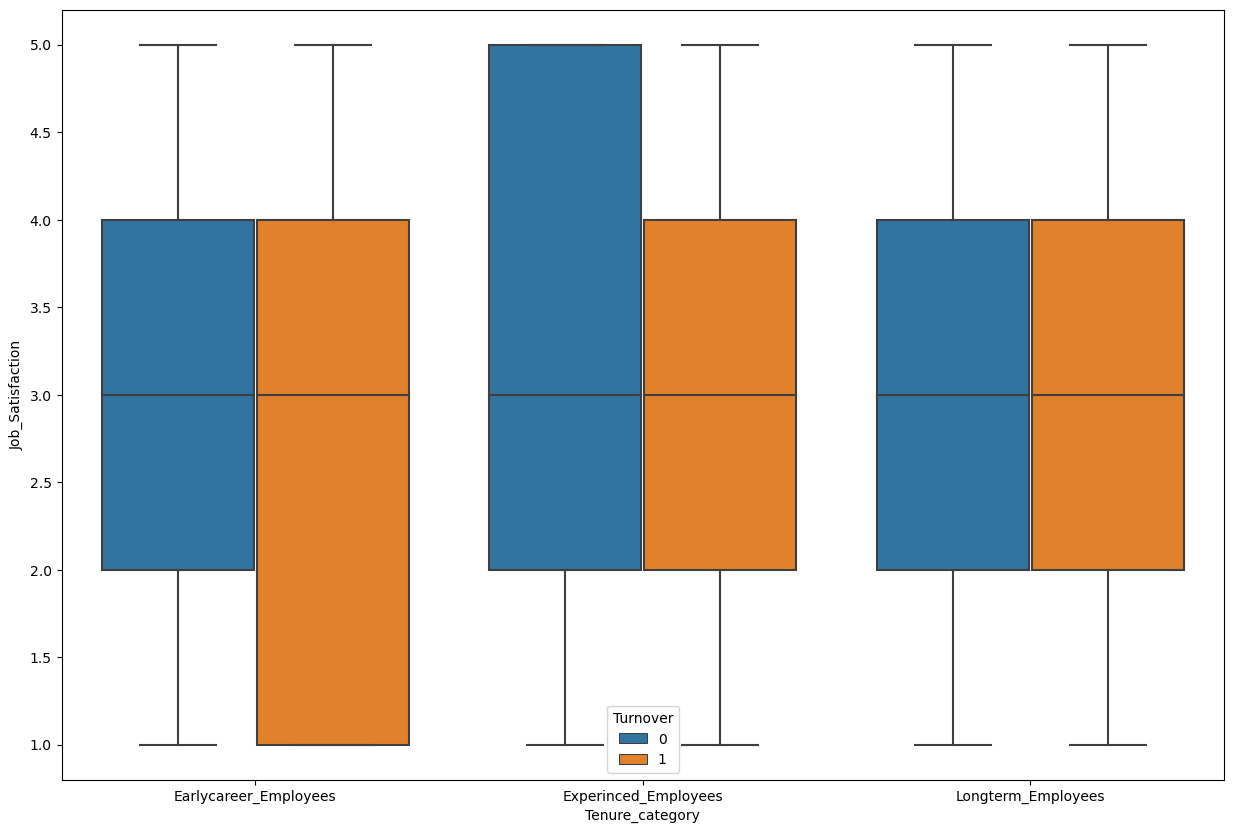

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Tenure_category', y= 'Job_Satisfaction', hue='Turnover', data=turnover_df);

In [36]:
# Data Cleaning and Processing

# Check for missing values
#missing_values = turnover_df.isnull().sum()

# Encode categorical variables
turnover_df['Gender'] = turnover_df['Gender'].astype('category').cat.codes
turnover_df['Department'] = turnover_df['Department'].astype('category').cat.codes
turnover_df['Position'] = turnover_df['Position'].astype('category').cat.codes
turnover_df['Recruitment_Source'] = turnover_df['Recruitment_Source'].astype('category').cat.codes
turnover_df['Turnover_Description'] = turnover_df['Turnover_Description'].astype('category').cat.codes

# Drop 'Employee_ID' as it's a unique identifier not useful for modeling
data_processed = turnover_df.drop(['Employee_ID'], axis=1)

missing_values, turnover_df.head(5)

(Employee_ID             0
 Age                     0
 Gender                  0
 Department              0
 Position                0
 Tenure                  0
 Performance_Rating      0
 Salary                  0
 Recruitment_Source      0
 Satisfaction_Score      0
 Last_Promotion_Years    0
 Work_Life_Balance       0
 Overworked              0
 Job_Satisfaction        0
 Distance_From_Work      0
 Commute_Time            0
 Number_Of_Promotions    0
 Turnover                0
 Turnover_Description    0
 dtype: int64,
    Employee_ID  Age  Gender  Department  Position  Tenure  Performance_Rating  \
 0            0   60       1           2         1      24                   2   
 1            1   50       1           2         3      28                   2   
 2            2   36       0           1         0      18                   4   
 3            3   64       1           1         2       3                   4   
 4            4   29       0           2         2      22    

In [37]:
turnover_df.head()

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description,Tenure_category
0,0,60,1,2,1,24,2,80818,0,1.9,7,3,1,4,26,78,0,0,0,Longterm_Employees
1,1,50,1,2,3,28,2,59932,0,4.5,4,4,0,2,26,30,3,0,0,Longterm_Employees
2,2,36,0,1,0,18,4,36901,2,3.7,0,1,0,5,18,86,3,0,0,Experinced_Employees
3,3,64,1,1,2,3,4,38597,0,2.2,7,4,1,3,32,28,4,0,0,Earlycareer_Employees
4,4,29,0,2,2,22,3,93909,0,2.1,8,4,0,2,14,45,2,0,0,Longterm_Employees


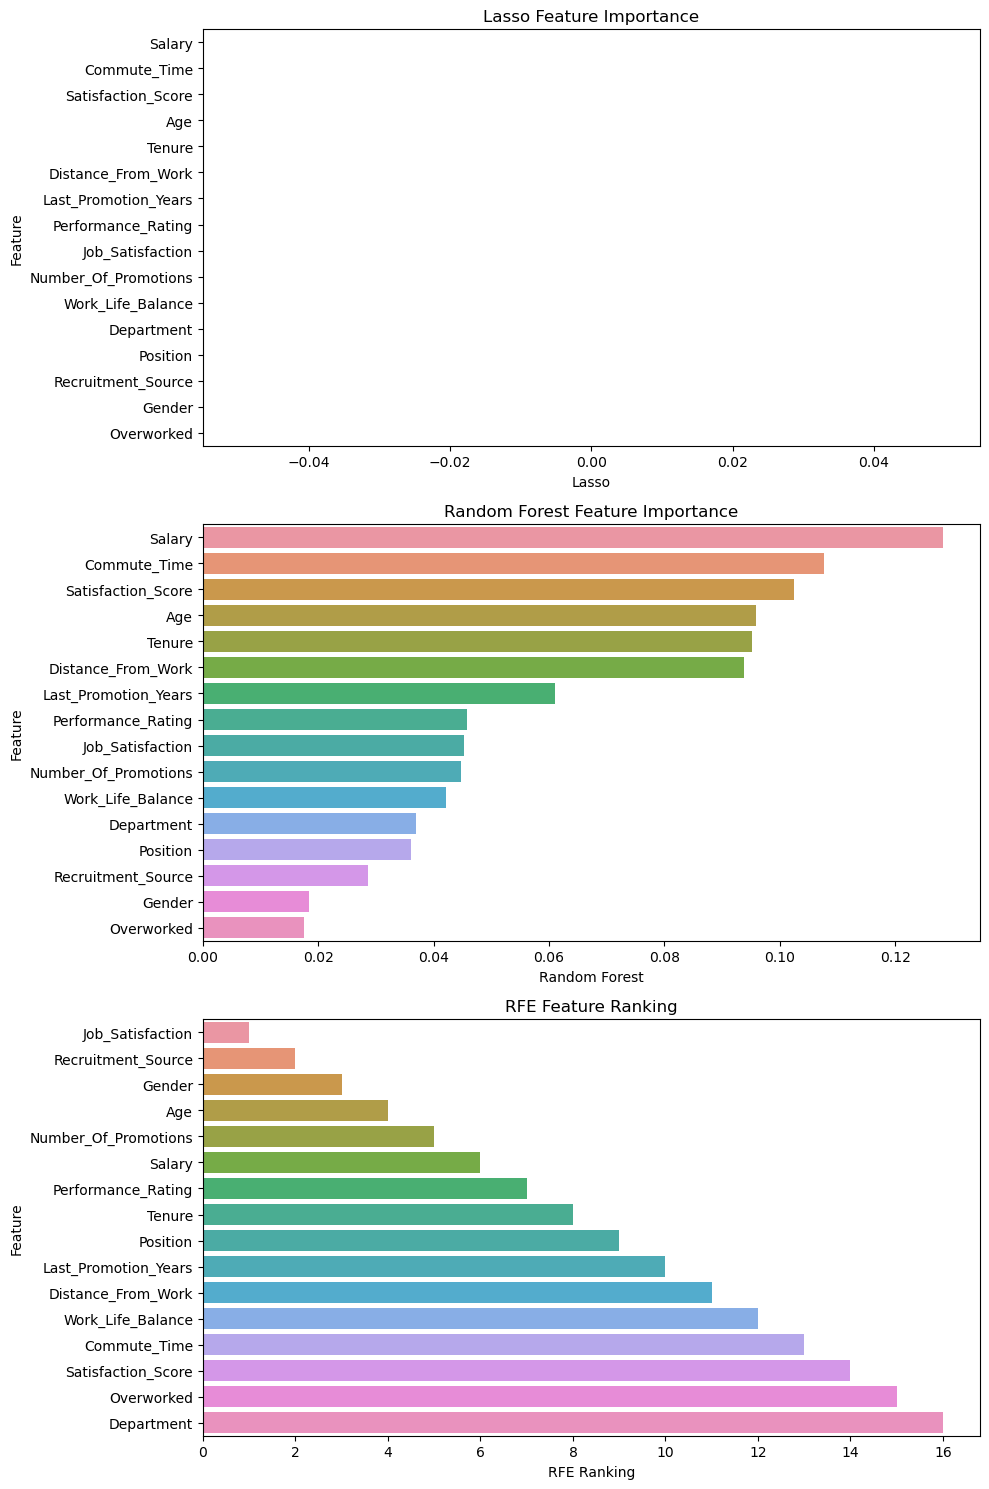

,Feature,Lasso,Random Forest,RFE Ranking
6,Salary,0.0,0.128273,6
14,Commute_Time,0.0,0.107597,13
8,Satisfaction_Score,0.0,0.102534,14
0,Age,0.0,0.095887,4
4,Tenure,0.0,0.095207,8
13,Distance_From_Work,0.0,0.093775,11
9,Last_Promotion_Years,0.0,0.060949,10
5,Performance_Rating,0.0,0.045819,7
12,Job_Satisfaction,0.0,0.045336,1
15,Number_Of_Promotions,0.0,0.044796,5


In [38]:
#Feature Importance
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature Engineering
# Assuming 'Turnover' is our target variable, we'll prepare features and target
X = data_processed.drop(['Turnover', 'Turnover_Description', 'Tenure_category'], axis=1)
y = data_processed['Turnover']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models for feature importance
log_reg = LogisticRegression(max_iter=10000)
lasso = LassoCV(cv=5)
rf = RandomForestClassifier(n_estimators=100)

# Lasso for feature importance
lasso.fit(X_scaled, y)
lasso_importance = np.abs(lasso.coef_)

# Random Forest for feature importance
rf.fit(X_scaled, y)
rf_importance = rf.feature_importances_

# Recursive Feature Elimination with Logistic Regression
rfe = RFE(estimator=log_reg, n_features_to_select=1, step=1)
rfe.fit(X_scaled, y)
rfe_ranking = rfe.ranking_

# Combining importances
feature_names = X.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Lasso': lasso_importance,
    'Random Forest': rf_importance,
    'RFE Ranking': rfe_ranking
}).sort_values('Random Forest', ascending=False)

# Plotting feature importances
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x='Lasso', y='Feature', data=importances, ax=ax[0])
ax[0].set_title('Lasso Feature Importance')
sns.barplot(x='Random Forest', y='Feature', data=importances, ax=ax[1])
ax[1].set_title('Random Forest Feature Importance')
sns.barplot(x='RFE Ranking', y='Feature', data=importances.sort_values('RFE Ranking'), ax=ax[2])
ax[2].set_title('RFE Feature Ranking')

plt.tight_layout()
plt.show()

importances


In [39]:
#Building Classification Algorithms amd Modelling

In [40]:
turnover_df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover', 'Turnover_Description',
       'Tenure_category'],
      dtype='object')

In [41]:
model_df = turnover_df [['Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions']]

In [42]:
model_df

,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions
0,60,1,2,1,24,2,80818,0,1.9,7,3,1,4,26,78,0
1,50,1,2,3,28,2,59932,0,4.5,4,4,0,2,26,30,3
2,36,0,1,0,18,4,36901,2,3.7,0,1,0,5,18,86,3
3,64,1,1,2,3,4,38597,0,2.2,7,4,1,3,32,28,4
4,29,0,2,2,22,3,93909,0,2.1,8,4,0,2,14,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,0,0,3,24,3,88502,1,4.7,7,2,0,1,38,87,1
996,25,1,2,2,17,4,78849,2,3.5,7,4,0,4,30,76,4
997,43,0,0,0,18,5,56347,2,4.9,5,1,0,4,41,62,1
998,23,0,0,1,22,3,79056,1,3.3,9,2,0,5,30,18,0


In [43]:
Target = turnover_df[['Turnover']]
Target

,Turnover
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,0
997,1
998,0


In [44]:
#Spliting of dataset int training and testing 

X_train, X_test, y_train, y_test = train_test_split(model_df, Target,test_size=0.2, random_state=42)

In [45]:
# Model Building 

# Logistics Regression

l_r = LogisticRegression()

l_r.fit(X_train, y_train)

l_pred = l_r.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test,l_pred))
print('Precision:', precision_score(y_test,l_pred))
print('Recall:', recall_score(y_test,l_pred))
print('F1-score:', f1_score(y_test,l_pred))
print('AUC-ROC:', roc_auc_score(y_test,l_pred))

Logistic Regression
Accuracy: 0.775
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


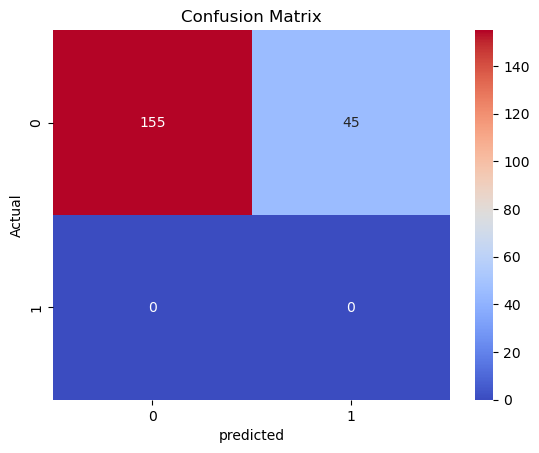

In [46]:
# Confusion Matrix

lcm = confusion_matrix(l_pred, y_test)

# Visualization in Confusion Matrix
sns.heatmap(lcm, annot=True,cmap = 'coolwarm', fmt = 'g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#Train the model
Gbc = GradientBoostingClassifier()

# Fit the model to the training data
Gbc.fit(X_train, y_train)

# Predict labels for the test data
Gbc_pred = Gbc.predict(X_test)

# Print evaluation metrics
print('GradientBoostingClassifier')
print('Accuracy:', accuracy_score(y_test, Gbc_pred))
print('Precision:', precision_score(y_test, Gbc_pred))
print('Recall:', recall_score(y_test, Gbc_pred))
print('F1-score:', f1_score(y_test, Gbc_pred))
print('AUC-ROC:', roc_auc_score(y_test, Gbc_pred))

GradientBoostingClassifier
Accuracy: 0.755
Precision: 0.16666666666666666
Recall: 0.022222222222222223
F1-score: 0.0392156862745098
AUC-ROC: 0.49498207885304657


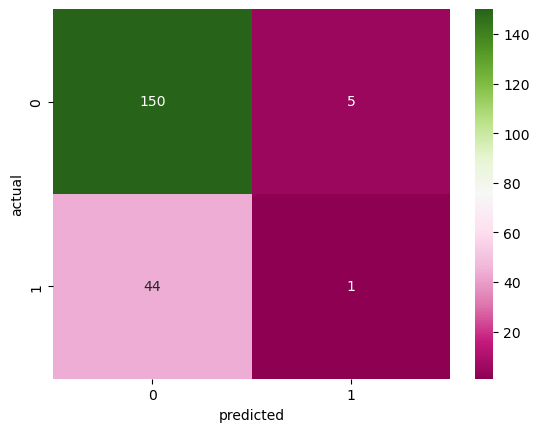

In [48]:
Gbc = confusion_matrix(y_test,Gbc_pred)

# Visualize the confusion matrix
sns.heatmap(Gbc,annot=True,cmap='PiYG',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rcf_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rcf_pred))
print('Precision:', precision_score(y_test, rcf_pred))
print('Recall:', recall_score(y_test, rcf_pred))
print('F1-score:', f1_score(y_test, rcf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rcf_pred))

Random Forest Classifier
Accuracy: 0.77
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.4967741935483871


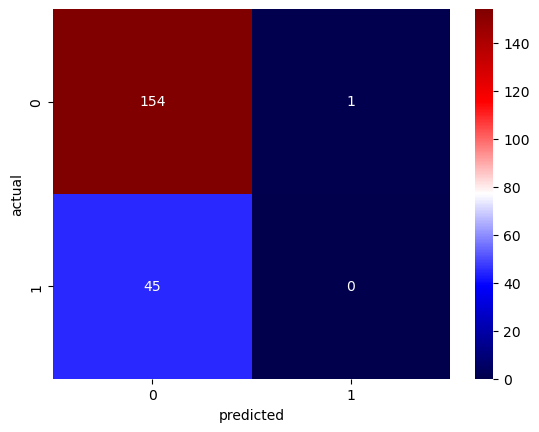

In [50]:
rfc = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(rfc,annot=True,cmap='seismic',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [51]:
#Train the model
Svm = SVC()

# Fit the model to the training data
Svm.fit(X_train, y_train)

# Predict labels for the test data
Svm_pred = Svm.predict(X_test)

# Print evaluation metrics
print('SVC')
print('Accuracy:', accuracy_score(y_test, Svm_pred))
print('Precision:', precision_score(y_test, Svm_pred))
print('Recall:', recall_score(y_test, Svm_pred))
print('F1-score:', f1_score(y_test, Svm_pred))
print('AUC-ROC:', roc_auc_score(y_test, Svm_pred))

SVC
Accuracy: 0.775
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


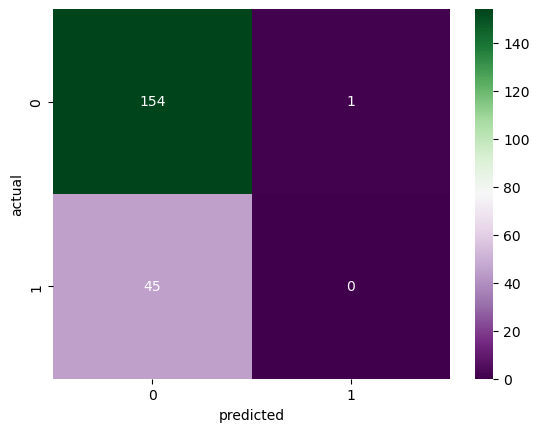

In [52]:
Svm = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(Svm,annot=True,cmap='PRGn',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [53]:
# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.63
Precision: 0.10810810810810811
Recall: 0.08888888888888889
F1-score: 0.0975609756097561
ROC-AUC: 0.4379928315412186


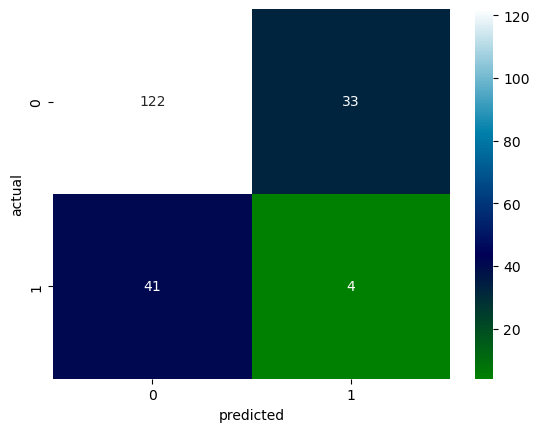

In [54]:
dt_classifier = confusion_matrix(y_test,y_pred)

# Visualize the confusion matrix
sns.heatmap(dt_classifier,annot=True,cmap='ocean',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [55]:
#Experimenting with 26 different algorithms from Lazypredict library

In [56]:
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 93%|████████████████████████████████████████████████████████████████████████████▎     | 27/29 [00:04<00:00,  6.63it/s]

[LightGBM] [Info] Number of positive: 148, number of negative: 652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185000 -> initscore=-1.482832
[LightGBM] [Info] Start training from score -1.482832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.20it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.76               0.54     0.54      0.71   
KNeighborsClassifier               0.77               0.51     0.51      0.69   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
LGBMClassifier                     0.76               0.50     0.50      0.68   
SVC                                0.78               0.50     0.50      0.68   
RidgeClassifierCV                  0.78               0.50     0.50      0.68   
RidgeClassifier                    0.78             

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:05<00:00,  5.76it/s]

[LightGBM] [Info] Number of positive: 148, number of negative: 652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185000 -> initscore=-1.482832
[LightGBM] [Info] Start training from score -1.482832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.18it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


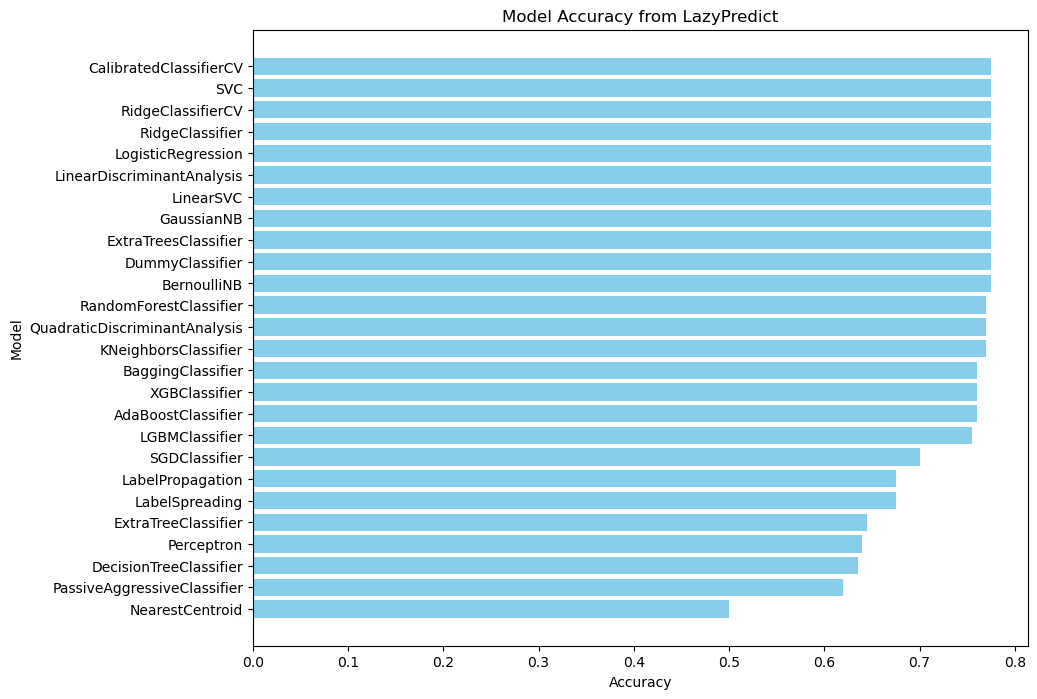

In [57]:
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming X_scaled and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Convert the models DataFrame to a more plot-friendly format
models_sorted = models.sort_values('Accuracy', ascending=False)  # Sorting by Accuracy for better visualization

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(models_sorted.index, models_sorted['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy from LazyPredict')
plt.gca().invert_yaxis()  # To display the highest accuracy at the top
plt.show()


In [58]:
#Optimising performance by Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Logistic Regression parameters
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Random Forest parameters
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# SVC parameters
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# XGBClassifier parameters
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Instantiate the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV or RandomizedSearchCV for each model
# Note: Depending on your computational resources and time, you might prefer RandomizedSearchCV over GridSearchCV

# Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, verbose=1, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, verbose=1, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# SVC
svc_grid = GridSearchCV(svc, svc_params, cv=5, verbose=1, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# XGBClassifier
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, verbose=1, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Print the best parameters and scores
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_, "with accuracy:", log_reg_grid.best_score_)
print("Best parameters for Random Forest:", rf_grid.best_params_, "with accuracy:", rf_grid.best_score_)
print("Best parameters for SVC:", svc_grid.best_params_, "with accuracy:", svc_grid.best_score_)
print("Best parameters for XGBClassifier:", xgb_grid.best_params_, "with accuracy:", xgb_grid.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2'} with accuracy: 0.8150000000000001
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100} with accuracy: 0.8150000000000001
Best parameters for SVC: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'} with accuracy: 0.8150000000000001
Best parameters for XGBClassifier: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} with accuracy: 0.8150000000000001


In [60]:
#Visualizing Hyperparameter performance

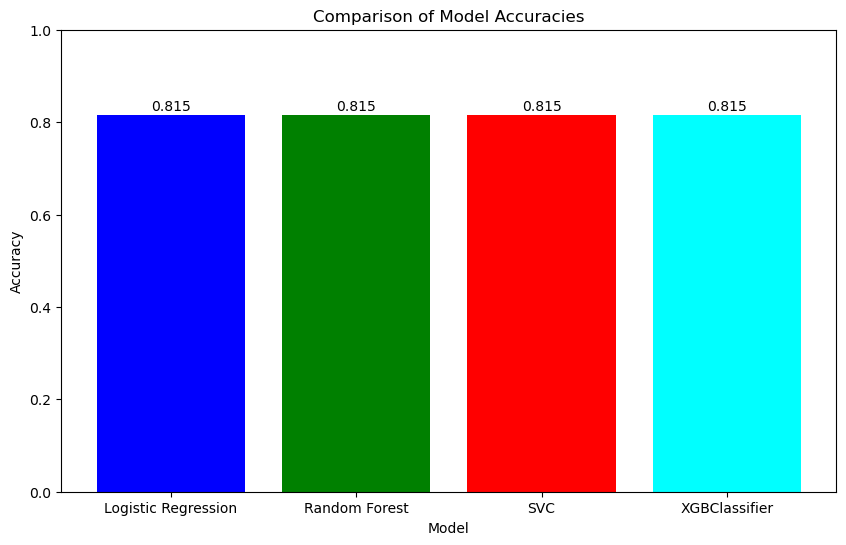

In [61]:
import matplotlib.pyplot as plt

# Assuming best_score_ attributes are from the tuned models
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'XGBClassifier']
model_scores = [
    log_reg_grid.best_score_,
    rf_grid.best_score_,
    svc_grid.best_score_,
    xgb_grid.best_score_
]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Assuming accuracy scores, adjust if using another metric
for i in range(len(model_scores)):
    plt.text(i, model_scores[i] + 0.01, f"{model_scores[i]:.3f}", ha = 'center')

plt.show()


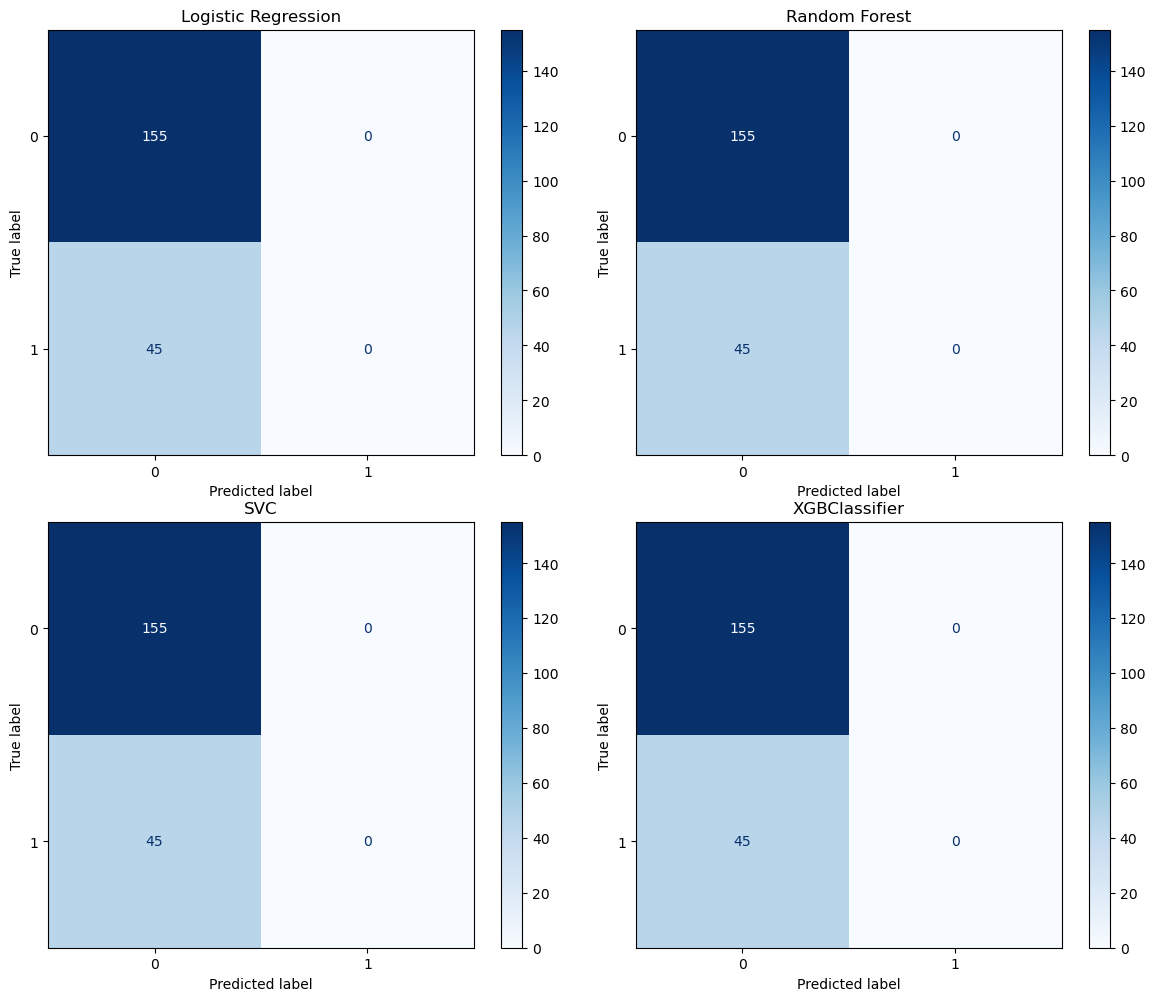

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the best models (assuming this step is done)

# Plotting confusion matrices using the updated function
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay.from_estimator(log_reg_grid.best_estimator_, X_test, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_estimator(rf_grid.best_estimator_, X_test, y_test, ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Random Forest')

ConfusionMatrixDisplay.from_estimator(svc_grid.best_estimator_, X_test, y_test, ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('SVC')

ConfusionMatrixDisplay.from_estimator(xgb_grid.best_estimator_, X_test, y_test, ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('XGBClassifier')

plt.tight_layout()
plt.show()

In [63]:
#Insights from the Dataset
#With a workforce turnover rate of 19.3%, the insights generated here contribute to a more comprehensive review 
#of the organization's challenges.
#●	Tech Innovations Inc. has 1000 employees, comprising both male and female employees.
#●	807 are active employees in the company, with a turnover of 193 above the 10% acceptable threshold. 
#●	Experienced and long-term employees exhibit the highest turnover rates, whereas early-career employees 
#have the lowest turnover, possibly influenced by policies tailored to retirement planning. 
#●	There's a blend of departing employees with varying lengths of tenure, suggesting that the longer-tenured 
#employees tend to leave the company more.
#●	The marketing and finance departments experience frequent turnover among Specialists and Analysts, while turnover,
#particularly among managers, is notable in the Sales and Engineering departments. 
#●	Internal referrals appear frequent among departing employees, indicating that discontent may exist even 
#among those endorsed by current staff members.
#●	Workers departing the company typically exhibit lower satisfaction scores, suggesting discontent with 
#their current positions or the organization.

In [64]:
#Insights from the Machine Learning
#The machine learning modelling showed that Logistic Regression, SVC and Random Forest algorithms performed similarly 
#in predicting the turnover attribute with 0.78, 0.78, and 0.77 scores, respectively, using the accuracy evaluation technique. 
#According to the Random Forest Features Importance Scale, the five most identified variables causing the turnover are Salary, 
#Commute time, satisfaction score, Age and Tenure. 


In [65]:
#RECOMMENDATIONS
#Tech Innovation Inc. should:
#●	Develop a comprehensive employee retention strategy aimed at lowering turnover rates. The program might include 
#implementing initiatives and incentives like skill development, mentorship, and recognition programs. 
#●	Provide more career development opportunities, especially for high-performing employees in their positions 
#for longer tenure, to boost employee satisfaction and loyalty, thereby creating a stable workforce capable of 
#weathering challenges. 
#●	Establish a transparent career progression framework to tackle concerns about satisfaction scores and performance ratings.
#This scenario may entail instituting frequent performance evaluations, providing comprehensive training initiatives 
#and fostering avenues for internal mobility within the company.
#●	Promote a supportive workforce atmosphere and organizational culture, prioritizing employee wellness, acknowledgement
#and professional growth. 
#●	Conduct regular employee surveys to gather feedback and address any concerns or areas for improvement.
#●	Promptly address any issues identified through turnover analysis, including dissatisfaction with salary, 
#limited advancement opportunities, or challenges with work-life balance.


In [66]:
#Conclusion
#An advanced, data-driven employee turnover prediction system for Tech Innovation Inc. was developed. 
#This technology helps to tackle issues relating to conventional HR methods and enhance recruitment and 
#retention problems in the telecommunications sector. Adopting the recommendations will create a sustainable 
#solution for reducing turnover rates, thus enhancing employee retention and overall organizational success.
